In [1]:
# imports
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sqlalchemy import text, create_engine
# local
from env import get_db_url

In [2]:
# function to deal with parsing one entry in our log data
def parse_log_entry(entry):
    parts = entry.split()
    output = {'ip': parts[0], 'timestamp': parts[3][1:].replace(':', ' ', 1)}
    output['request_method'] = parts[5][1:]
    output['request_path'] = parts[6]
    output['http_version'] = parts[7][:-1]
    output['status_code'] = parts[8]
    output['size'] = int(parts[9])
    output['user_agent'] = ' '.join(parts[11:]).replace('"', '')
    return pd.Series(output)
# df = pd.read_sql(text('SELECT * FROM api_access'), create_engine(get_db_url('logs')).connect())
df = pd.read_sql('SELECT * FROM api_access', get_db_url('logs'))
# df = pd.concat([df.entry, df.entry.apply(parse_log_entry)], axis=1)
df = df.entry.apply(parse_log_entry)
df.timestamp = df.timestamp.astype('datetime64[ns]')
df.head()

,ip,timestamp,request_method,request_path,http_version,status_code,size,user_agent
0,97.105.19.58,2019-04-16 19:34:42,GET,/api/v1/sales?page=81,HTTP/1.1,200,512495,python-requests/2.21.0
1,97.105.19.58,2019-04-16 19:34:42,GET,/api/v1/items,HTTP/1.1,200,3561,python-requests/2.21.0
2,97.105.19.58,2019-04-16 19:34:44,GET,/api/v1/sales?page=82,HTTP/1.1,200,510103,python-requests/2.21.0
3,97.105.19.58,2019-04-16 19:34:46,GET,/api/v1/sales?page=83,HTTP/1.1,200,510003,python-requests/2.21.0
4,97.105.19.58,2019-04-16 19:34:48,GET,/api/v1/sales?page=84,HTTP/1.1,200,511963,python-requests/2.21.0


In [3]:
df['size_mb'] = (((df['size'])/1024)/1024)
df

,ip,timestamp,request_method,request_path,http_version,status_code,size,user_agent,size_mb
0,97.105.19.58,2019-04-16 19:34:42,GET,/api/v1/sales?page=81,HTTP/1.1,200,512495,python-requests/2.21.0,0.488753
1,97.105.19.58,2019-04-16 19:34:42,GET,/api/v1/items,HTTP/1.1,200,3561,python-requests/2.21.0,0.003396
2,97.105.19.58,2019-04-16 19:34:44,GET,/api/v1/sales?page=82,HTTP/1.1,200,510103,python-requests/2.21.0,0.486472
3,97.105.19.58,2019-04-16 19:34:46,GET,/api/v1/sales?page=83,HTTP/1.1,200,510003,python-requests/2.21.0,0.486377
4,97.105.19.58,2019-04-16 19:34:48,GET,/api/v1/sales?page=84,HTTP/1.1,200,511963,python-requests/2.21.0,0.488246
...,...,...,...,...,...,...,...,...,...
13969,97.105.19.58,2019-04-17 12:55:12,GET,/api/v1/sales?page=62,HTTP/1.1,200,511544,python-requests/2.21.0,0.487846
13970,97.105.19.58,2019-04-17 12:55:12,GET,/api/v1/sales?page=65,HTTP/1.1,200,511201,python-requests/2.21.0,0.487519
13971,97.105.19.58,2019-04-17 12:55:13,GET,/api/v1/sales?page=73,HTTP/1.1,200,511781,python-requests/2.21.0,0.488072
13972,97.105.19.58,2019-04-17 12:55:13,GET,/api/v1/sales?page=69,HTTP/1.1,200,510136,python-requests/2.21.0,0.486504


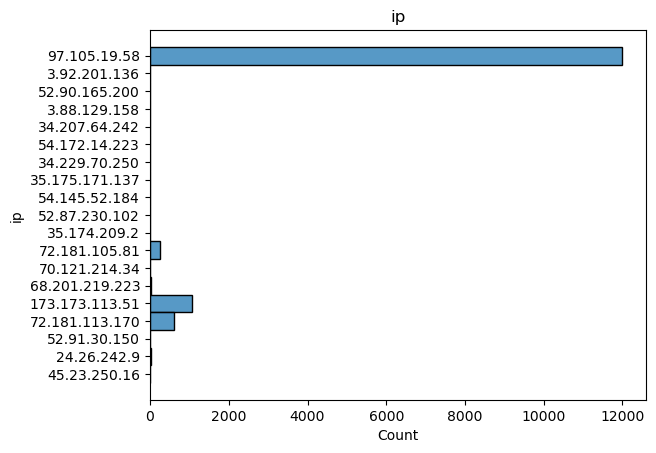

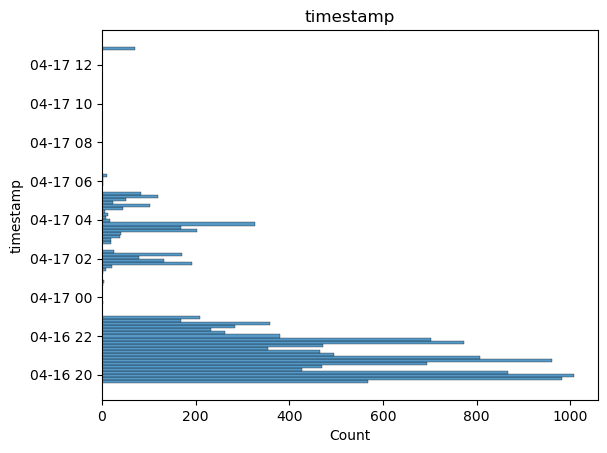

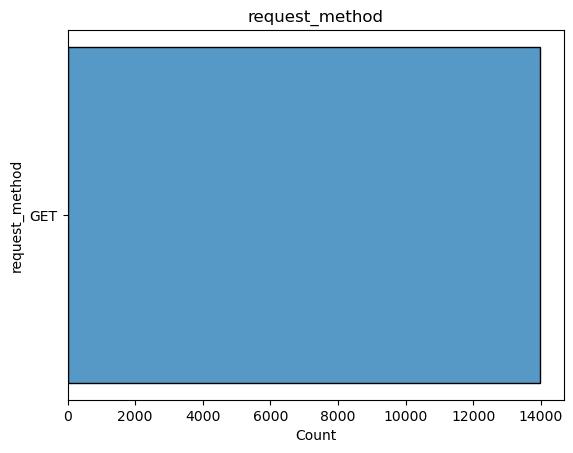

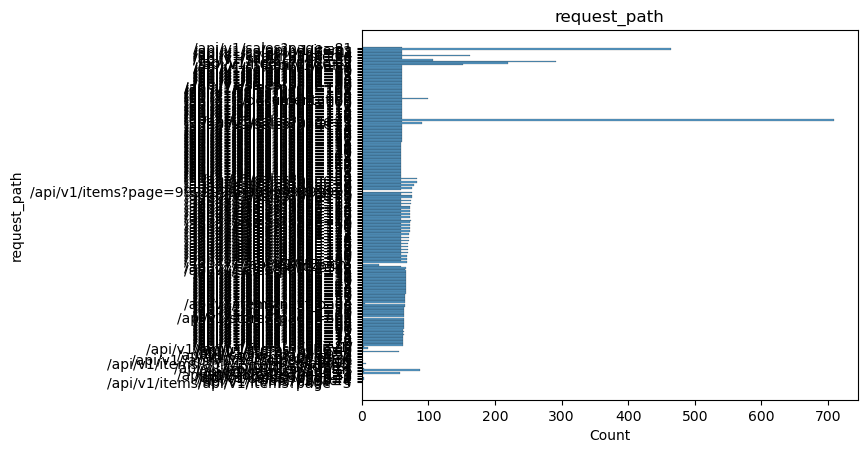

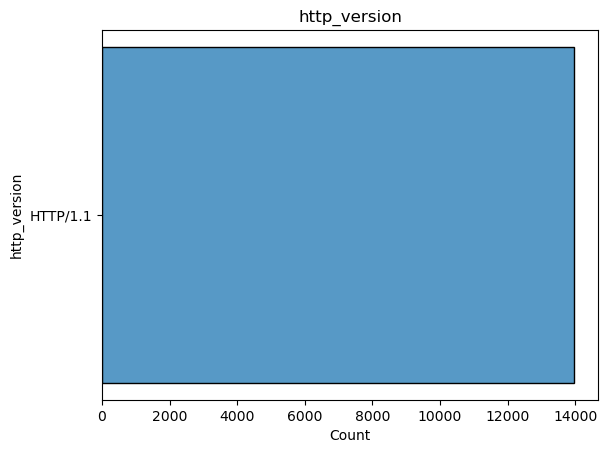

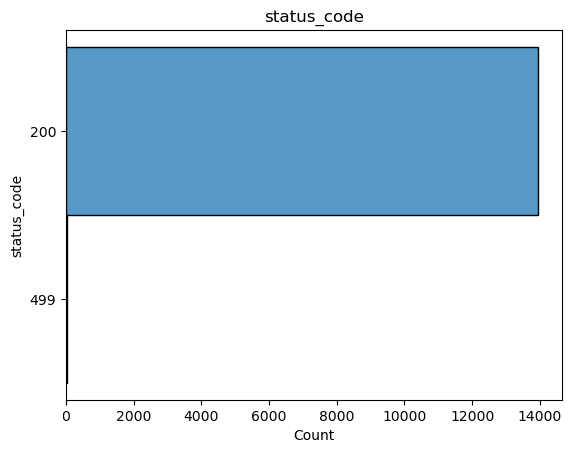

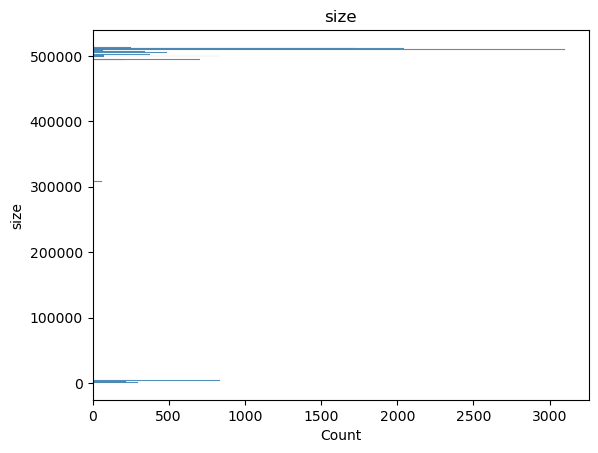

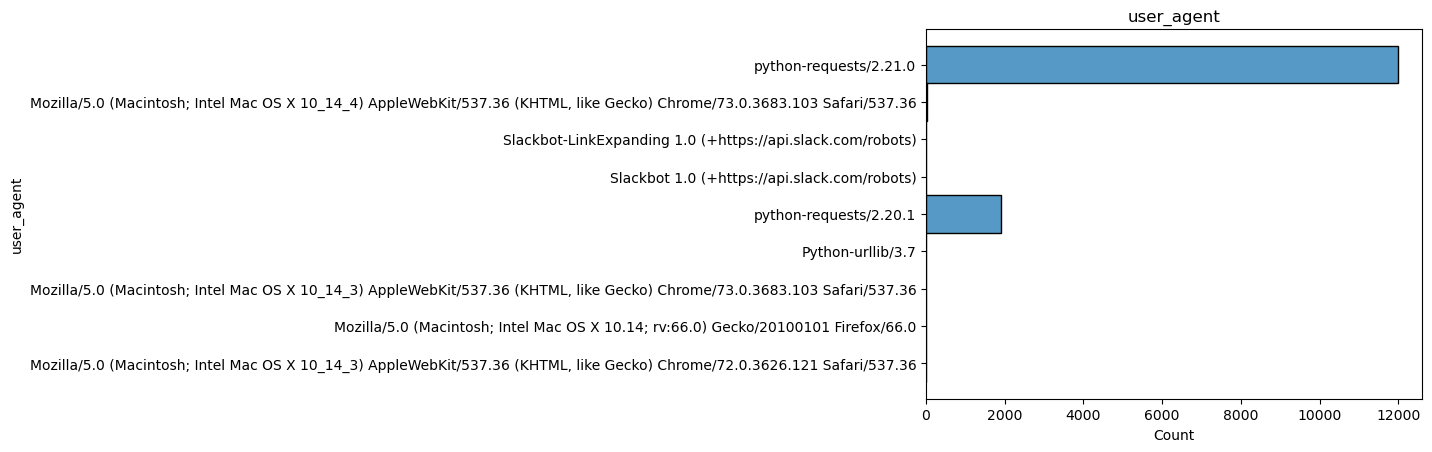

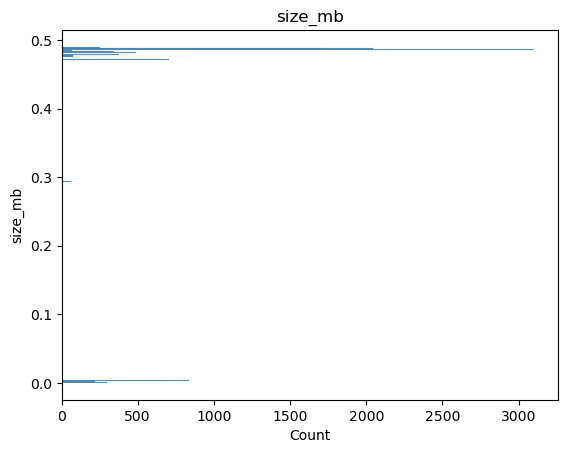

In [4]:
for col in df.columns:
    sns.histplot(data=df,y=col)
    plt.title(col)
    plt.show()

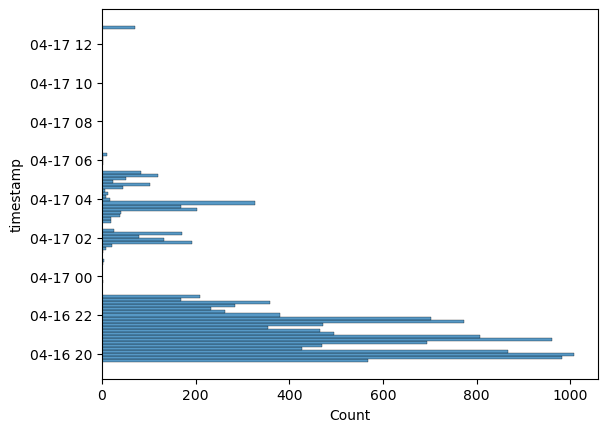

In [5]:
sns.histplot(data=df.sort_values('timestamp'),y='timestamp')
plt.show()

In [6]:
df.describe(datetime_is_numeric=True)

,timestamp,size,size_mb
count,13974,13974.000000,13974.000000
mean,2019-04-16 21:56:18.870044416,449900.797338,0.429059
min,2019-04-16 19:34:42,0.000000,0.000000
25%,2019-04-16 20:12:49,500637.000000,0.477445
50%,2019-04-16 21:04:05,510138.000000,0.486506
75%,2019-04-16 22:06:26.500000,511291.000000,0.487605
max,2019-04-17 12:55:14,513736.000000,0.489937
std,NaN,160742.535606,0.153296


In [7]:
df

,ip,timestamp,request_method,request_path,http_version,status_code,size,user_agent,size_mb
0,97.105.19.58,2019-04-16 19:34:42,GET,/api/v1/sales?page=81,HTTP/1.1,200,512495,python-requests/2.21.0,0.488753
1,97.105.19.58,2019-04-16 19:34:42,GET,/api/v1/items,HTTP/1.1,200,3561,python-requests/2.21.0,0.003396
2,97.105.19.58,2019-04-16 19:34:44,GET,/api/v1/sales?page=82,HTTP/1.1,200,510103,python-requests/2.21.0,0.486472
3,97.105.19.58,2019-04-16 19:34:46,GET,/api/v1/sales?page=83,HTTP/1.1,200,510003,python-requests/2.21.0,0.486377
4,97.105.19.58,2019-04-16 19:34:48,GET,/api/v1/sales?page=84,HTTP/1.1,200,511963,python-requests/2.21.0,0.488246
...,...,...,...,...,...,...,...,...,...
13969,97.105.19.58,2019-04-17 12:55:12,GET,/api/v1/sales?page=62,HTTP/1.1,200,511544,python-requests/2.21.0,0.487846
13970,97.105.19.58,2019-04-17 12:55:12,GET,/api/v1/sales?page=65,HTTP/1.1,200,511201,python-requests/2.21.0,0.487519
13971,97.105.19.58,2019-04-17 12:55:13,GET,/api/v1/sales?page=73,HTTP/1.1,200,511781,python-requests/2.21.0,0.488072
13972,97.105.19.58,2019-04-17 12:55:13,GET,/api/v1/sales?page=69,HTTP/1.1,200,510136,python-requests/2.21.0,0.486504


In [8]:
df[['path','page']] = df['request_path'].str.split(pat='?', expand=True)
df['hour'] = df['timestamp'].dt.hour
df

,ip,timestamp,request_method,request_path,http_version,status_code,size,user_agent,size_mb,path,page,hour
0,97.105.19.58,2019-04-16 19:34:42,GET,/api/v1/sales?page=81,HTTP/1.1,200,512495,python-requests/2.21.0,0.488753,/api/v1/sales,page=81,19
1,97.105.19.58,2019-04-16 19:34:42,GET,/api/v1/items,HTTP/1.1,200,3561,python-requests/2.21.0,0.003396,/api/v1/items,None,19
2,97.105.19.58,2019-04-16 19:34:44,GET,/api/v1/sales?page=82,HTTP/1.1,200,510103,python-requests/2.21.0,0.486472,/api/v1/sales,page=82,19
3,97.105.19.58,2019-04-16 19:34:46,GET,/api/v1/sales?page=83,HTTP/1.1,200,510003,python-requests/2.21.0,0.486377,/api/v1/sales,page=83,19
4,97.105.19.58,2019-04-16 19:34:48,GET,/api/v1/sales?page=84,HTTP/1.1,200,511963,python-requests/2.21.0,0.488246,/api/v1/sales,page=84,19
...,...,...,...,...,...,...,...,...,...,...,...,...
13969,97.105.19.58,2019-04-17 12:55:12,GET,/api/v1/sales?page=62,HTTP/1.1,200,511544,python-requests/2.21.0,0.487846,/api/v1/sales,page=62,12
13970,97.105.19.58,2019-04-17 12:55:12,GET,/api/v1/sales?page=65,HTTP/1.1,200,511201,python-requests/2.21.0,0.487519,/api/v1/sales,page=65,12
13971,97.105.19.58,2019-04-17 12:55:13,GET,/api/v1/sales?page=73,HTTP/1.1,200,511781,python-requests/2.21.0,0.488072,/api/v1/sales,page=73,12
13972,97.105.19.58,2019-04-17 12:55:13,GET,/api/v1/sales?page=69,HTTP/1.1,200,510136,python-requests/2.21.0,0.486504,/api/v1/sales,page=69,12


In [9]:
path_given_agent = df.groupby('user_agent').path.value_counts(normalize=True).rename('p_path_given_agent').reset_index().sort_values('p_path_given_agent')
path_given_agent[~path_given_agent.user_agent.str.contains('python-requests')].sort_values('p_path_given_agent')

,user_agent,path,p_path_given_agent
16,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...,/api/v1//api/v1/items/next_page,0.029412
17,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...,/api/v1/I_DIDNT_DO_IT!!!!,0.029412
18,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...,/api/v1/helloclass!,0.029412
19,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...,/api/v1/sales,0.029412
14,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...,/,0.029412
15,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...,/api/V1/HiZach!,0.029412
13,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...,/api/v1/items,0.058824
12,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...,/api/v1//api/v1/items,0.058824
11,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...,/api/v1/,0.058824
4,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; ...,/documentation,0.125000


In [10]:
path_given_size_mb = df.groupby('size_mb').path.value_counts(normalize=True).rename('p_path_given_size_mb').reset_index().sort_values('p_path_given_size_mb')
path_given_size_mb[path_given_size_mb.p_path_given_size_mb<1].sort_values('p_path_given_size_mb')

,size_mb,path,p_path_given_size_mb
18,0.000154,/api/v1/items&page=0,0.014493
17,0.000154,/api/v1/helloclass!,0.014493
16,0.000154,/api/v1/I_DIDNT_DO_IT!!!!,0.014493
15,0.000154,/api/v1//api/v1/items/next_page,0.014493
14,0.000154,/api/V1/HiZach!,0.014493
13,0.000154,/api/v1items,0.028986
10,0.000154,/api/v1/itemsitems,0.043478
11,0.000154,/api/v1/sales/,0.043478
12,0.000154,/api/v1/store,0.043478
9,0.000154,/api/v1/,0.057971


In [11]:
agent_given_size_mb = df.groupby('size_mb').user_agent.value_counts(normalize=True).rename('p_agent_given_size_mb').reset_index()
agent_given_size_mb[~agent_given_size_mb.user_agent.str.contains('python-requests')].sort_values('p_agent_given_size_mb')

,size_mb,user_agent,p_agent_given_size_mb
33,0.003396,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...,0.001825
36,0.003489,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; ...,0.003436
32,0.003396,Slackbot-LinkExpanding 1.0 (+https://api.slack...,0.003650
26,0.001266,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; ...,0.004367
29,0.001704,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; ...,0.004566
48,0.471025,Slackbot-LinkExpanding 1.0 (+https://api.slack...,0.004785
6,0.000040,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; ...,0.009346
7,0.000040,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3...,0.009346
8,0.000040,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...,0.009346
47,0.471025,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; ...,0.009569


In [12]:
ip_given_hour = df.groupby('hour').ip.value_counts(normalize=True).rename('p_ip_given_hour').reset_index()
ip_given_hour[ip_given_hour.p_ip_given_hour<1].sort_values('p_ip_given_hour')

,hour,ip,p_ip_given_hour
31,21,54.145.52.184,0.000292
30,21,52.87.230.102,0.000292
29,21,35.174.209.2,0.000292
25,19,54.172.14.223,0.000446
24,19,52.90.165.200,0.000446
23,19,34.229.70.250,0.000446
22,19,34.207.64.242,0.000446
21,19,3.92.201.136,0.000446
20,19,3.88.129.158,0.000446
28,21,35.175.171.137,0.000583


In [13]:
status_given_hour = df.groupby('hour').status_code.value_counts(normalize=True).rename('p_status_given_hour').reset_index()
status_given_hour[status_given_hour.status_code!='200']

,hour,status_code,p_status_given_hour
3,2,499,0.003521
5,3,499,0.001239
12,19,499,0.000891
14,20,499,0.001526
16,21,499,0.001166
18,22,499,0.000594


In [14]:
status_given_path = df.groupby('path').status_code.value_counts(normalize=True).rename('p_status_given_path').reset_index()
# status_given_path[status_given_path.status_code!='200'].sort_values('p_status_given_path')
status_given_path.sort_values('p_status_given_path')

,path,status_code,p_status_given_path
15,/api/v1/sales,499,0.000968
9,/api/v1/items,499,0.003756
8,/api/v1/items,200,0.996244
14,/api/v1/sales,200,0.999032
0,/,200,1.000000
19,/api/v1items,200,1.000000
18,/api/v1/stores,200,1.000000
17,/api/v1/store,200,1.000000
16,/api/v1/sales/,200,1.000000
13,/api/v1/itemsitems,200,1.000000


In [19]:
df

,ip,timestamp,request_method,request_path,http_version,status_code,size,user_agent,size_mb,path,page,hour
0,97.105.19.58,2019-04-16 19:34:42,GET,/api/v1/sales?page=81,HTTP/1.1,200,512495,python-requests/2.21.0,0.488753,/api/v1/sales,page=81,19
1,97.105.19.58,2019-04-16 19:34:42,GET,/api/v1/items,HTTP/1.1,200,3561,python-requests/2.21.0,0.003396,/api/v1/items,None,19
2,97.105.19.58,2019-04-16 19:34:44,GET,/api/v1/sales?page=82,HTTP/1.1,200,510103,python-requests/2.21.0,0.486472,/api/v1/sales,page=82,19
3,97.105.19.58,2019-04-16 19:34:46,GET,/api/v1/sales?page=83,HTTP/1.1,200,510003,python-requests/2.21.0,0.486377,/api/v1/sales,page=83,19
4,97.105.19.58,2019-04-16 19:34:48,GET,/api/v1/sales?page=84,HTTP/1.1,200,511963,python-requests/2.21.0,0.488246,/api/v1/sales,page=84,19
...,...,...,...,...,...,...,...,...,...,...,...,...
13969,97.105.19.58,2019-04-17 12:55:12,GET,/api/v1/sales?page=62,HTTP/1.1,200,511544,python-requests/2.21.0,0.487846,/api/v1/sales,page=62,12
13970,97.105.19.58,2019-04-17 12:55:12,GET,/api/v1/sales?page=65,HTTP/1.1,200,511201,python-requests/2.21.0,0.487519,/api/v1/sales,page=65,12
13971,97.105.19.58,2019-04-17 12:55:13,GET,/api/v1/sales?page=73,HTTP/1.1,200,511781,python-requests/2.21.0,0.488072,/api/v1/sales,page=73,12
13972,97.105.19.58,2019-04-17 12:55:13,GET,/api/v1/sales?page=69,HTTP/1.1,200,510136,python-requests/2.21.0,0.486504,/api/v1/sales,page=69,12


In [15]:
# get probability df
def get_prob(df,col1,col2):
    return df.groupby(col1)[col2].value_counts(normalize=True).rename(f'p_{col2}_given_{col1}').reset_index()



In [16]:
# create df that houses probability df of column1 given column0
# create placeholder
colby = None
# iterate through columns
for cols in itertools.permutations(df.columns,2):
    # def prob df
    prob_df = get_prob(df,cols[0],cols[1])
    # save first iteration
    if colby is None:
        colby = [{'col0':cols[0],'col1':cols[1],'variable':f'{cols[1]}_given_{cols[0]}','df':prob_df,'len_df':len(prob_df),'avg_prob':prob_df.iloc[:,-1].mean()}]
    # append all other iterations
    else:
        colby.append({'col0':cols[0],'col1':cols[1],'variable':f'{cols[1]}_given_{cols[0]}','df':prob_df,'len_df':len(prob_df),'avg_prob':prob_df.iloc[:,-1].mean()})
# make df
colby_df = pd.DataFrame(colby)
colby_df

,col0,col1,variable,df,len_df,avg_prob
0,ip,timestamp,timestamp_given_ip,ip timestamp p_t...,10043,0.001892
1,ip,request_method,request_method_given_ip,ip request_method p_request_m...,19,1.000000
2,ip,request_path,request_path_given_ip,ip ...,816,0.023284
3,ip,http_version,http_version_given_ip,ip http_version p_http_versio...,19,1.000000
4,ip,status_code,status_code_given_ip,ip status_code p_status_code_...,21,0.904762
...,...,...,...,...,...,...
127,hour,size,size_given_hour,hour size p_size_given_hour 0 0...,1594,0.008783
128,hour,user_agent,user_agent_given_hour,hour ...,32,0.437500
129,hour,size_mb,size_mb_given_hour,hour size_mb p_size_mb_given_hour 0 ...,1594,0.008783
130,hour,path,path_given_hour,hour path p_path_given_hour 0 ...,74,0.189189


In [ ]:
# ask ai how to create variable name from string

# create df that houses probability df of column1 given column0
# create placeholder
colby = None
# iterate through columns
for cols in itertools.permutations(df.columns,2):
    # def prob df
    prob_df = get_prob(df,cols[0],cols[1])
    # save first iteration
    var = f'{cols[1]}_given_{cols[0]}'
    var = {'col0':cols[0],'col1':cols[1],'variable':f'{cols[1]}_given_{cols[0]}','df':prob_df,'len_df':len(prob_df),'avg_prob':prob_df.iloc[:,-1].mean()}


,col0,col1,variable,df,len_df,avg_prob
0,ip,timestamp,timestamp_given_ip,ip timestamp p_t...,10043,0.001892
1,ip,request_method,request_method_given_ip,ip request_method p_request_m...,19,1.000000
2,ip,request_path,request_path_given_ip,ip ...,816,0.023284
3,ip,http_version,http_version_given_ip,ip http_version p_http_versio...,19,1.000000
4,ip,status_code,status_code_given_ip,ip status_code p_status_code_...,21,0.904762
...,...,...,...,...,...,...
127,hour,size,size_given_hour,hour size p_size_given_hour 0 0...,1594,0.008783
128,hour,user_agent,user_agent_given_hour,hour ...,32,0.437500
129,hour,size_mb,size_mb_given_hour,hour size_mb p_size_mb_given_hour 0 ...,1594,0.008783
130,hour,path,path_given_hour,hour path p_path_given_hour 0 ...,74,0.189189


In [17]:
colby_df.df[:5]

0                       ip           timestamp  p_t...
1                    ip request_method  p_request_m...
2                     ip                           ...
3                    ip http_version  p_http_versio...
4                    ip status_code  p_status_code_...
Name: df, dtype: object

In [18]:
# probability df pulled from bigger df based on variable
colby_df[colby_df.variable=='hour_given_path'].reset_index()['df'][0]

,path,hour,p_hour_given_path
0,/,20,0.485981
1,/,21,0.261682
2,/,19,0.140187
3,/,1,0.037383
4,/,2,0.037383
...,...,...,...
69,/favicon.ico,22,0.115385
70,/favicon.ico,2,0.076923
71,/favicon.ico,20,0.076923
72,/favicon.ico,1,0.038462
